<a href="https://colab.research.google.com/github/florianreyes/Life_expectancy_analysis/blob/main/life_expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import data from WHO life expectancy

In [232]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [233]:
data = pd.read_csv("/content/life_expectancy.csv")

In [234]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

- # Remove NA cells

In [235]:
data.dropna(axis = 0, inplace = True)

In [236]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

- # Rename cells with underscore

In [237]:
def rename_cols(df):
  new_cols = {}
  for column in df:
    new_cols[column] = column.strip().replace(" ", "_")  
  return new_cols

In [238]:
data = data.rename(columns = rename_cols(data))

- # Train test split

In [239]:
from sklearn.model_selection import train_test_split

In [240]:
x = data.drop(['Life_expectancy'], axis = 1)
y = data['Life_expectancy']

In [241]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [242]:
train_data = x_train.join(y_train)
test_data = x_test.join(y_test)

- # Remove dummies

In [243]:
pd.get_dummies(x_train['Status'])

,Developed,Developing
1822,0,1
2132,1,0
2295,0,1
2404,0,1
196,0,1
...,...,...
2908,0,1
1736,0,1
1881,0,1
1729,0,1


In [244]:
dummies = pd.get_dummies(x_train['Status'])

x_train = x_train.drop(['Status'], axis = 1).join(dummies['Developed'])

dummies2 = pd.get_dummies(x_test['Status'])

x_test = x_test.drop(['Status'], axis = 1).join(dummies2['Developed'])

In [245]:
train_data = train_data.drop(['Status'], axis = 1).join(dummies['Developed'])
test_data = test_data.drop(['Status'], axis = 1).join(dummies['Developed'])

- ## Separate developed and developing countries

In [246]:
train_data.query('Developed == 1')['Life_expectancy']

2132    77.0
995     89.0
2134    77.0
1297    79.4
1551    78.3
        ... 
2061    79.3
644     77.1
1541    81.1
385     74.3
2435    81.0
Name: Life_expectancy, Length: 193, dtype: float64

In [247]:
train_data = train_data.sort_values(['Year'])
test_data = test_data.sort_values(['Year'])

In [248]:
data_developed = train_data.query('Developed == 1')
data_not_developed = train_data.query('Developed == 0')

- ## Life expectancy graphs sorted by country and status

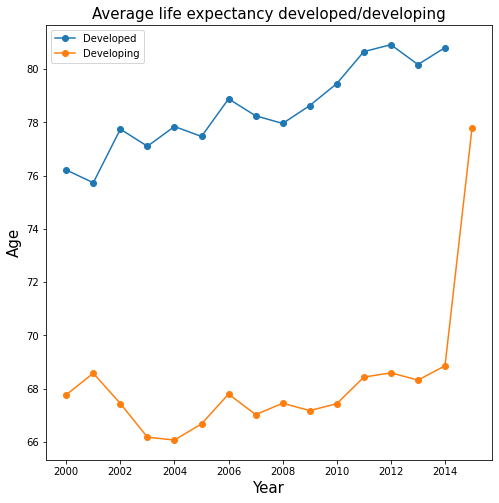

In [249]:
plt.figure(figsize=(8, 8))

plt.plot(data_developed.groupby(['Year']).mean()['Life_expectancy'] , "-o",label = 'Developed')
plt.plot(data_not_developed.groupby(['Year']).mean()['Life_expectancy'],"-o", label = 'Developing')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Age', fontsize = 15)
plt.title('Average life expectancy developed/developing', fontsize = 15)
plt.legend(loc = "upper left")

<BarContainer object of 7 artists>

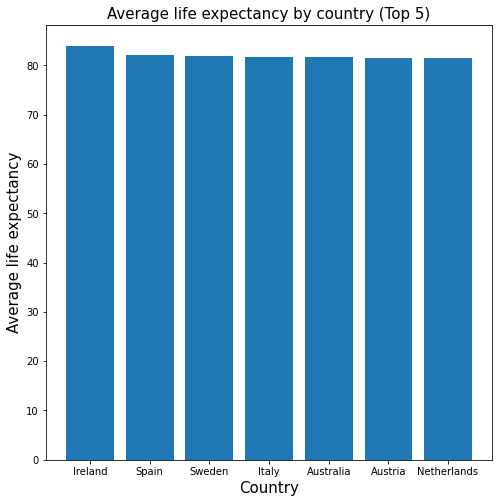

In [250]:
data_sorted_countries = data_developed.groupby(['Country'], as_index = False).mean().sort_values(['Life_expectancy'], ascending = False).head(7)
plt.figure(figsize=(8, 8))
plt.xlabel('Country', fontsize = 15)
plt.ylabel('Average life expectancy', fontsize = 15)
plt.title('Average life expectancy by country (Top 5)', fontsize = 15)
plt.bar(data_sorted_countries['Country'],data_sorted_countries['Life_expectancy'])

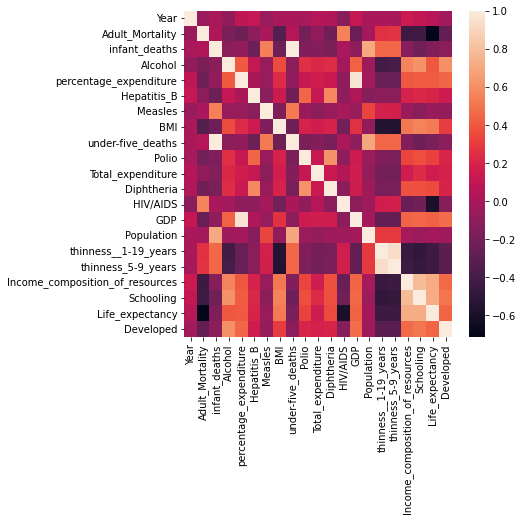

In [251]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(train_data.corr(), ax = ax)

In [253]:
data_sorted_by_corr = train_data.corr().sort_values(['Life_expectancy'])['Life_expectancy']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


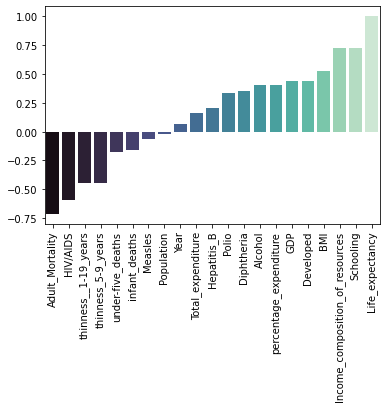

In [271]:
plt.xticks(rotation=90)
sns.barplot(data_sorted_by_corr.index,data_sorted_by_corr.values, palette = "mako")

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [ ]:
reg.fit(x_train.drop(['Country'], axis=1), y_train)

reg.score(x_test.drop(['Country'], axis=1), y_test)